In [212]:
import pandas as pd
"""
WARNING: 
    Do not run this table unless you want to create new CSV files in a specified directory,
    or if you want to load in the main dataset.

    I've commented out the for loop which saves csvs.
"""

# Read the CSV file into a DataFrame
df = pd.read_csv("/Users/declanbracken/Development/UofT_Projects/MIE_1624/Project/Main Science and Technology Indicators Tables/Science and Tech Indicators OECD.csv")

# Print out unique MSTI Variables
print("MSTI Variables:")
print(df['MSTI Variables'].unique())

# Define a subset of variables you want to create separate tables for
subset_variables = ['Business-financed GERD as a percentage of GDP', 
                    'Government-financed GERD as a percentage of GDP',  
                    'Number of "triadic" patent families (priority year)',
                    'Number of  patents in the biotechnology sector - applications filed under the PCT (priority year)',
                    'Number of  patents in the ICT sector - applications filed under the PCT (priority year)',
                    ]

# Create separate tables for the subset of variables and save each to CSV
# for variable in subset_variables:
#     subset_df = df[df['MSTI Variables'] == variable]
#     # Save the subset DataFrame to a CSV file
#     subset_df.to_csv(f"OECD_csv_files/{variable}_data.csv", index=False)
#     print(f"Saved {variable}_data.csv")
    

MSTI Variables:
['Gross Domestic Expenditure on R&D (GERD) at current PPP $'
 'GERD in national currency (for euro area: pre-EMU euro or EUR)'
 'GERD as a percentage of GDP' 'GERD at constant prices and PPP $'
 'GERD, compound annual growth rate (constant prices)'
 'GERD per capita population (current PPP $)'
 'Estimated Civil GERD as a percentage of GDP'
 'Basic research expenditure as a percentage of GDP'
 'Total researchers (FTE)'
 'Total researchers, compound annual growth rate'
 'Total researchers per thousand labour force'
 'Total researchers per thousand total employment'
 'Total R&D personnel (FTE)'
 'Total R&D personnel, compound annual growth rate'
 'Total R&D personnel per thousand labour force'
 'Total R&D personnel per thousand total employment'
 'Business-financed GERD as a percentage of GDP'
 'Government-financed GERD as a percentage of GDP'
 'Percentage of GERD financed by the business enterprise sector'
 'Percentage of GERD financed by government'
 'Percentage of GERD 

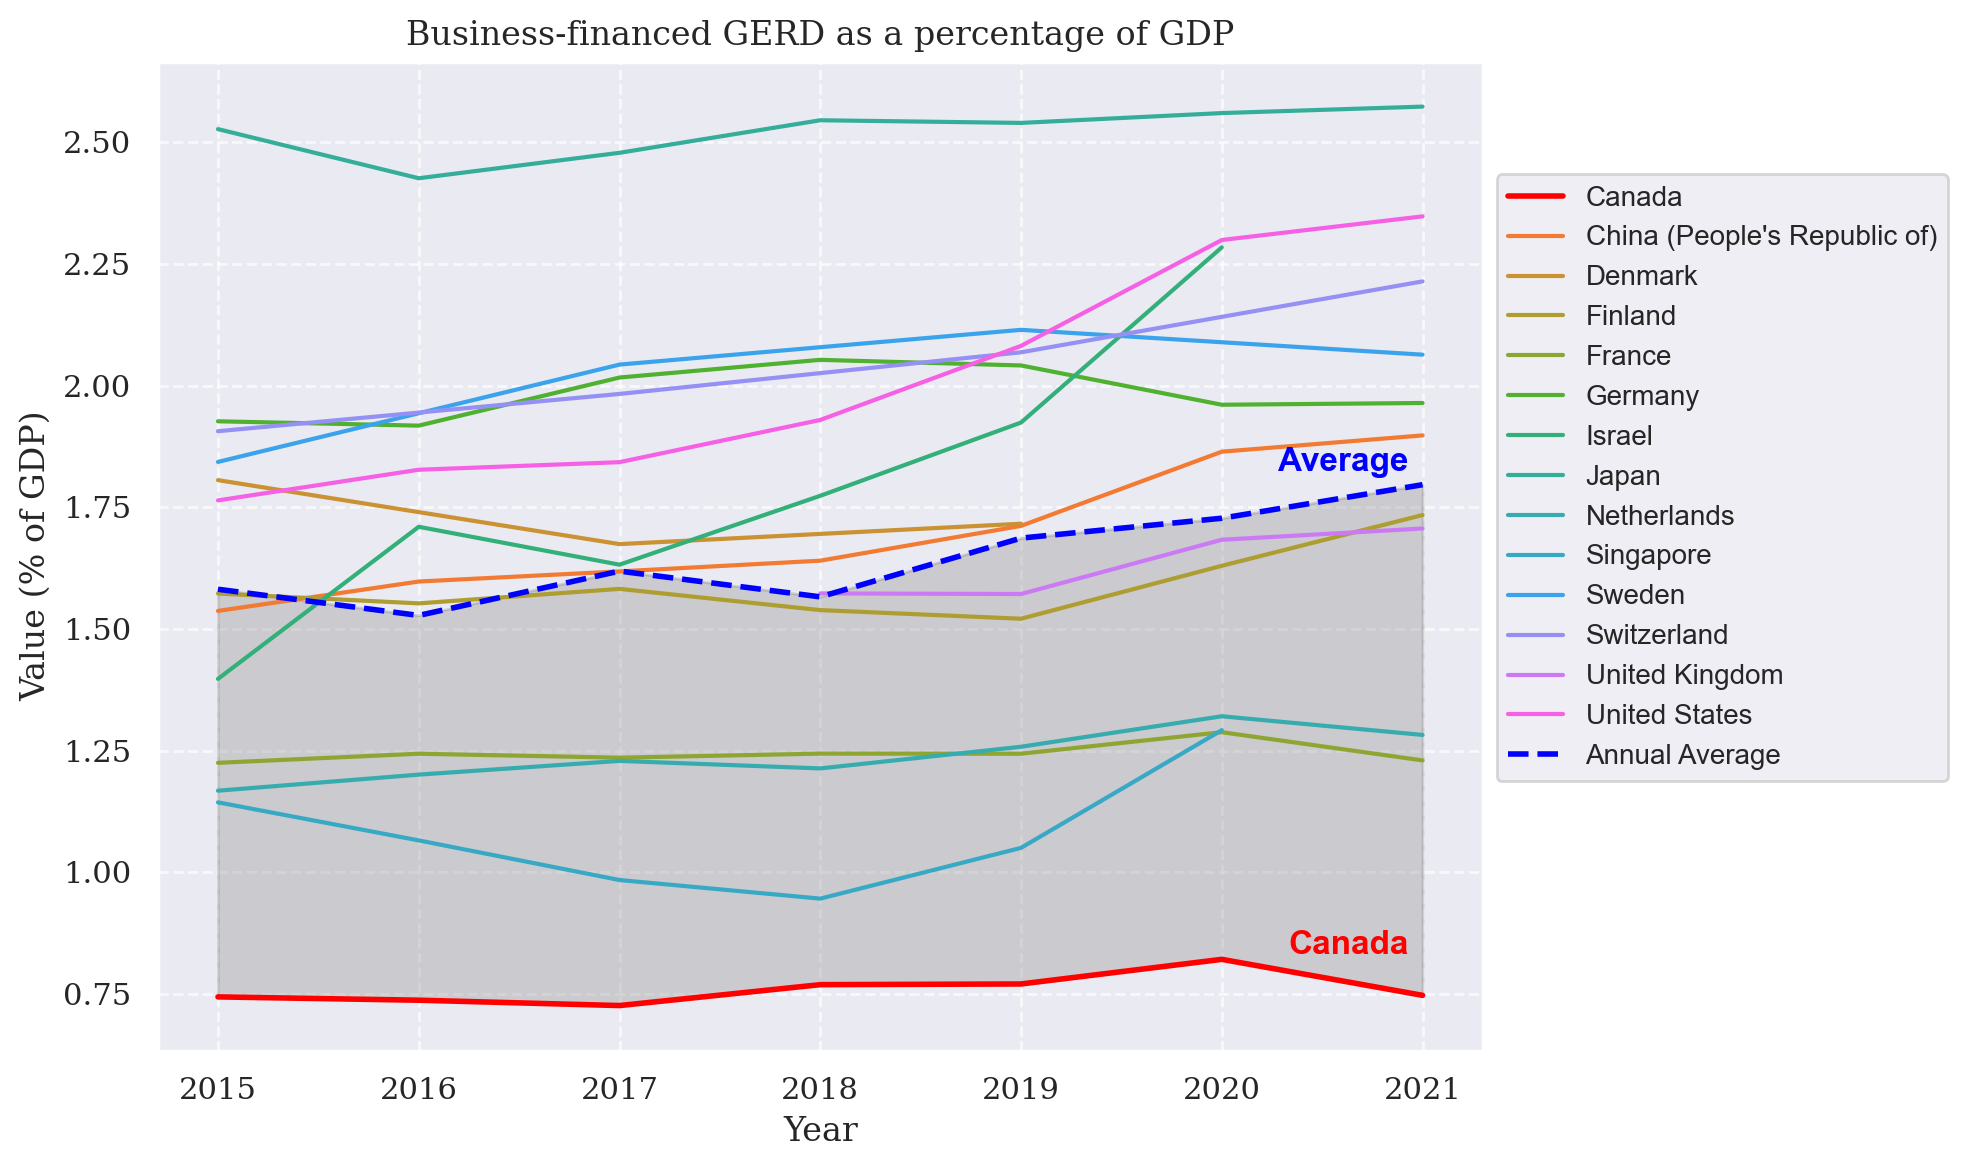

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load one of the CSV files (replace 'file_name.csv' with the actual filename)
directory = '/Users/declanbracken/Development/UofT_Projects/MIE_1624/Project/'
file_name = 'OECD_csv_files/Business-financed GERD as a percentage of GDP_data.csv'
file_directory = directory + file_name
df = pd.read_csv(file_directory)

Selected_Countries = [
    "CHE", 
    "SWE", 
    "USA", 
    "GBR", 
    "SGP", 
    "FIN", 
    "NLD", 
    "DEU", 
    "DNK", 
    "PRK", 
    "FRA", 
    "CHN", 
    "JPN", 
    "ISR", 
    "CAN"
    ]

# Set font size and font family
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})

# Function to plot data for selected countries
def plot_data(df, graph_title = None, yaxis_title = None, val_col = None, selected_countries=None, selected_years=None, set_ylim = None, use_shading = False, set_log_yaxis = False):
    if val_col == None:
        val_col = 'Value'

    if selected_countries:
        df_plot = df[df['COU'].isin(selected_countries)]
    else:
        df_plot = df
    
    if selected_years:
        df_plot = df_plot[df_plot['Year'].isin(selected_years)]
    
    fig, ax = plt.subplots(figsize=(10, 6), dpi = 200)
    
    # Use a color palette for better differentiation
    colors = sns.color_palette('husl', n_colors = len(selected_countries))
    sns.set_theme()
    # Calculate average value for each year
    avg_line = df_plot.groupby('Year')[val_col].mean()
    
    for i, (country, data) in enumerate(df_plot.groupby('Country')):
        # Highlight Canada with a bolder line
        if country == 'Canada':
            ax.plot(data['Year'], data[val_col], label=country, color='red', linewidth=2, zorder=10)
        else:
            ax.plot(data['Year'], data[val_col], label=country, color=colors[i])
    
    if graph_title is not None:
        ax.set_title(graph_title)
    else:
        ax.set_title(df_plot['MSTI Variables'].iloc[0])
    ax.set_xlabel('Year')

    if yaxis_title is not None:
        ax.set_ylabel(yaxis_title)
    else:
        ax.set_ylabel('Value (% of GDP)')

    # Plot average line
    ax.plot(avg_line.index, avg_line.values, color='blue', linestyle='--', linewidth=2, label='Annual Average', zorder=5)
    # Plot canada line
    CAN_line = df_plot[df_plot['COU'] == 'CAN'][val_col]

    if use_shading:
        ax.fill_between(df_plot['Year'].unique(), avg_line, CAN_line, color='gray', alpha=0.3)

    # Annotation for 'Canada'
    ax.annotate('Canada', xy=(avg_line.index[-1], CAN_line.values[-1]), xytext=(-5, 15), textcoords='offset points',
                fontsize=12, fontweight='bold', color='red', ha='right')

    # Annotation for 'Average'
    ax.annotate('Average', xy=(avg_line.index[-1], avg_line.values[-1]), xytext=(-5, 5), textcoords='offset points',
                fontsize=12, fontweight='bold', color='blue', ha='right')

    # Adjust tick marks and grid lines
    ax.xaxis.set_major_locator(plt.MaxNLocator(len(selected_years)))  # Set maximum number of tick marks
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer = True))
    ax.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
    
    # Simplify the legend
    ax.legend(loc='upper left', bbox_to_anchor=(1, 0.9), fontsize='small',fancybox = True)
    
    if set_ylim is not None:
        plt.ylim(0,set_ylim)
    if set_log_yaxis:
        ax.set_yscale('log')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()
    

# Plot data for selected countries and years
plot_data(df,selected_countries=Selected_Countries, 
          selected_years=[2015, 2016, 2017, 2018, 2019, 2020, 2021], 
          use_shading = True)
plt.show()


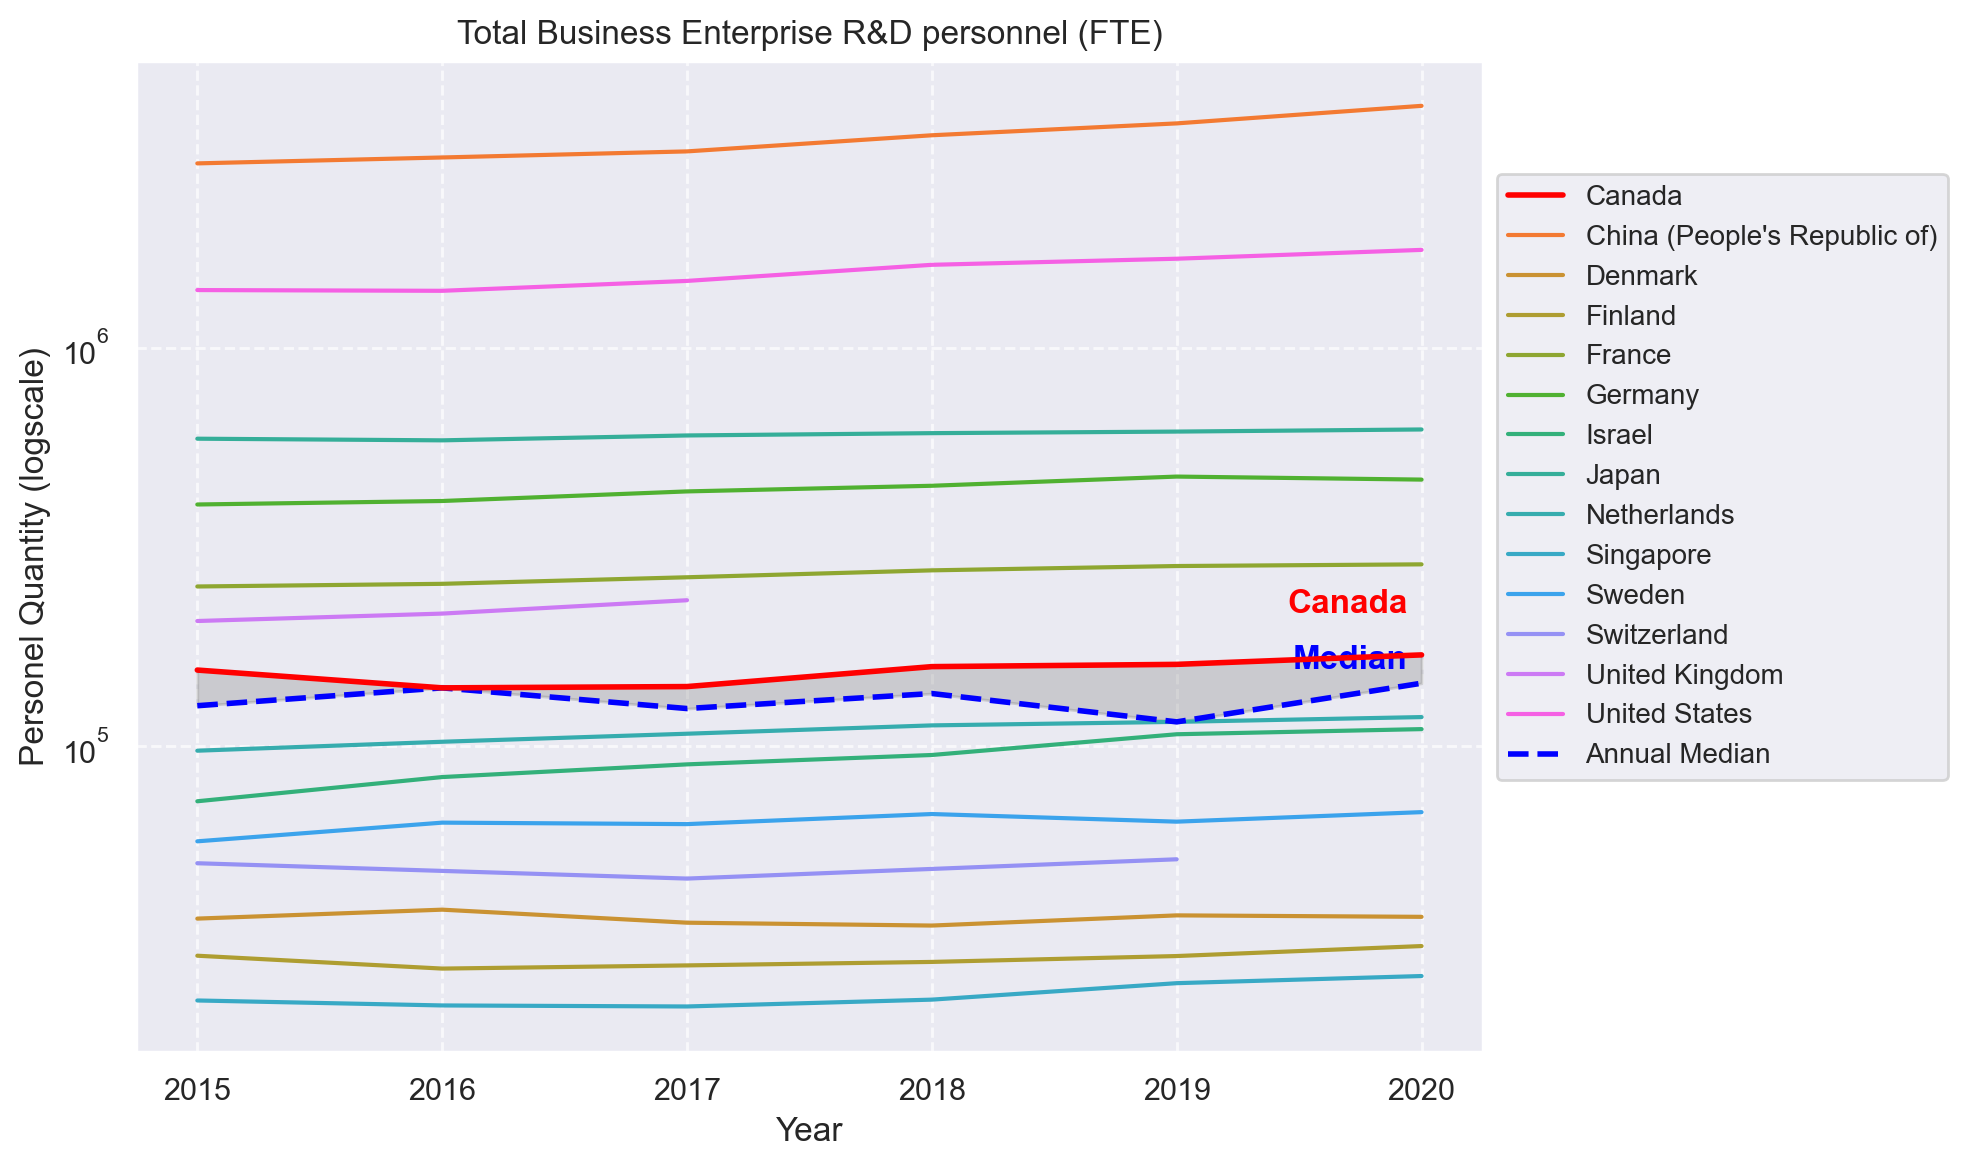

In [226]:
# Function to plot data for selected countries
def plot_data_median(df, graph_title=None, yaxis_title=None, val_col=None, selected_countries=None, selected_years=None, set_ylim=None, use_shading=False, set_log_yaxis=False):
    if val_col is None:
        val_col = 'Value'

    if selected_countries:
        df_plot = df[df['COU'].isin(selected_countries)]
    else:
        df_plot = df
    
    if selected_years:
        df_plot = df_plot[df_plot['Year'].isin(selected_years)]
    
    fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
    
    # Use a color palette for better differentiation
    colors = sns.color_palette('husl', n_colors=len(selected_countries))
    sns.set_theme()
    # Calculate median value for each year
    median_line = df_plot.groupby('Year')[val_col].median()
    
    for i, (country, data) in enumerate(df_plot.groupby('Country')):
        # Highlight Canada with a bolder line
        if country == 'Canada':
            ax.plot(data['Year'], data[val_col], label=country, color='red', linewidth=2, zorder=10)
        else:
            ax.plot(data['Year'], data[val_col], label=country, color=colors[i])
    
    if graph_title is not None:
        ax.set_title(graph_title)
    else:
        ax.set_title(df_plot['MSTI Variables'].iloc[0])
    ax.set_xlabel('Year')

    if yaxis_title is not None:
        ax.set_ylabel(yaxis_title)
    else:
        ax.set_ylabel('Value (% of GDP)')

    # Plot median line
    ax.plot(median_line.index, median_line.values, color='blue', linestyle='--', linewidth=2, label='Annual Median', zorder=5)
    # Plot Canada line
    CAN_line = df_plot[df_plot['COU'] == 'CAN'][val_col]

    if use_shading:
        ax.fill_between(df_plot['Year'].unique(), median_line, CAN_line, color='gray', alpha=0.3)

    # Annotation for 'Canada'
    ax.annotate('Canada', xy=(median_line.index[-1], CAN_line.values[-1]), xytext=(-5, 15), textcoords='offset points',
                fontsize=12, fontweight='bold', color='red', ha='right')

    # Annotation for 'Median'
    ax.annotate('Median', xy=(median_line.index[-1], median_line.values[-1]), xytext=(-5, 5), textcoords='offset points',
                fontsize=12, fontweight='bold', color='blue', ha='right')

    # Adjust tick marks and grid lines
    ax.xaxis.set_major_locator(plt.MaxNLocator(len(selected_years)))  # Set maximum number of tick marks
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
    
    # Simplify the legend
    ax.legend(loc='upper left', bbox_to_anchor=(1, 0.9), fontsize='small', fancybox=True)
    
    if set_ylim is not None:
        plt.ylim(0, set_ylim)
    if set_log_yaxis:
        ax.set_yscale('log')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

directory = '/Users/declanbracken/Development/UofT_Projects/MIE_1624/Project/'
file_name = 'OECD_csv_files/Number of "triadic" patent families (priority year)_data.csv'
file_directory = directory + file_name
df = pd.read_csv(file_directory)

# Load one of the CSV files (replace 'file_name.csv' with the actual filename)
directory = '/Users/declanbracken/Development/UofT_Projects/MIE_1624/Project/'
file_name = 'OECD_csv_files/Total Business Enterprise R&D personnel (FTE)_data.csv'
file_directory = directory + file_name
df = pd.read_csv(file_directory)

# Plot data for selected countries and years
plot_data_median(df, selected_countries=Selected_Countries, 
          yaxis_title = 'Personel Quantity (logscale)',
          selected_years=[2015, 2016, 2017, 2018, 2019, 2020], 
          use_shading = True, set_log_yaxis = True)


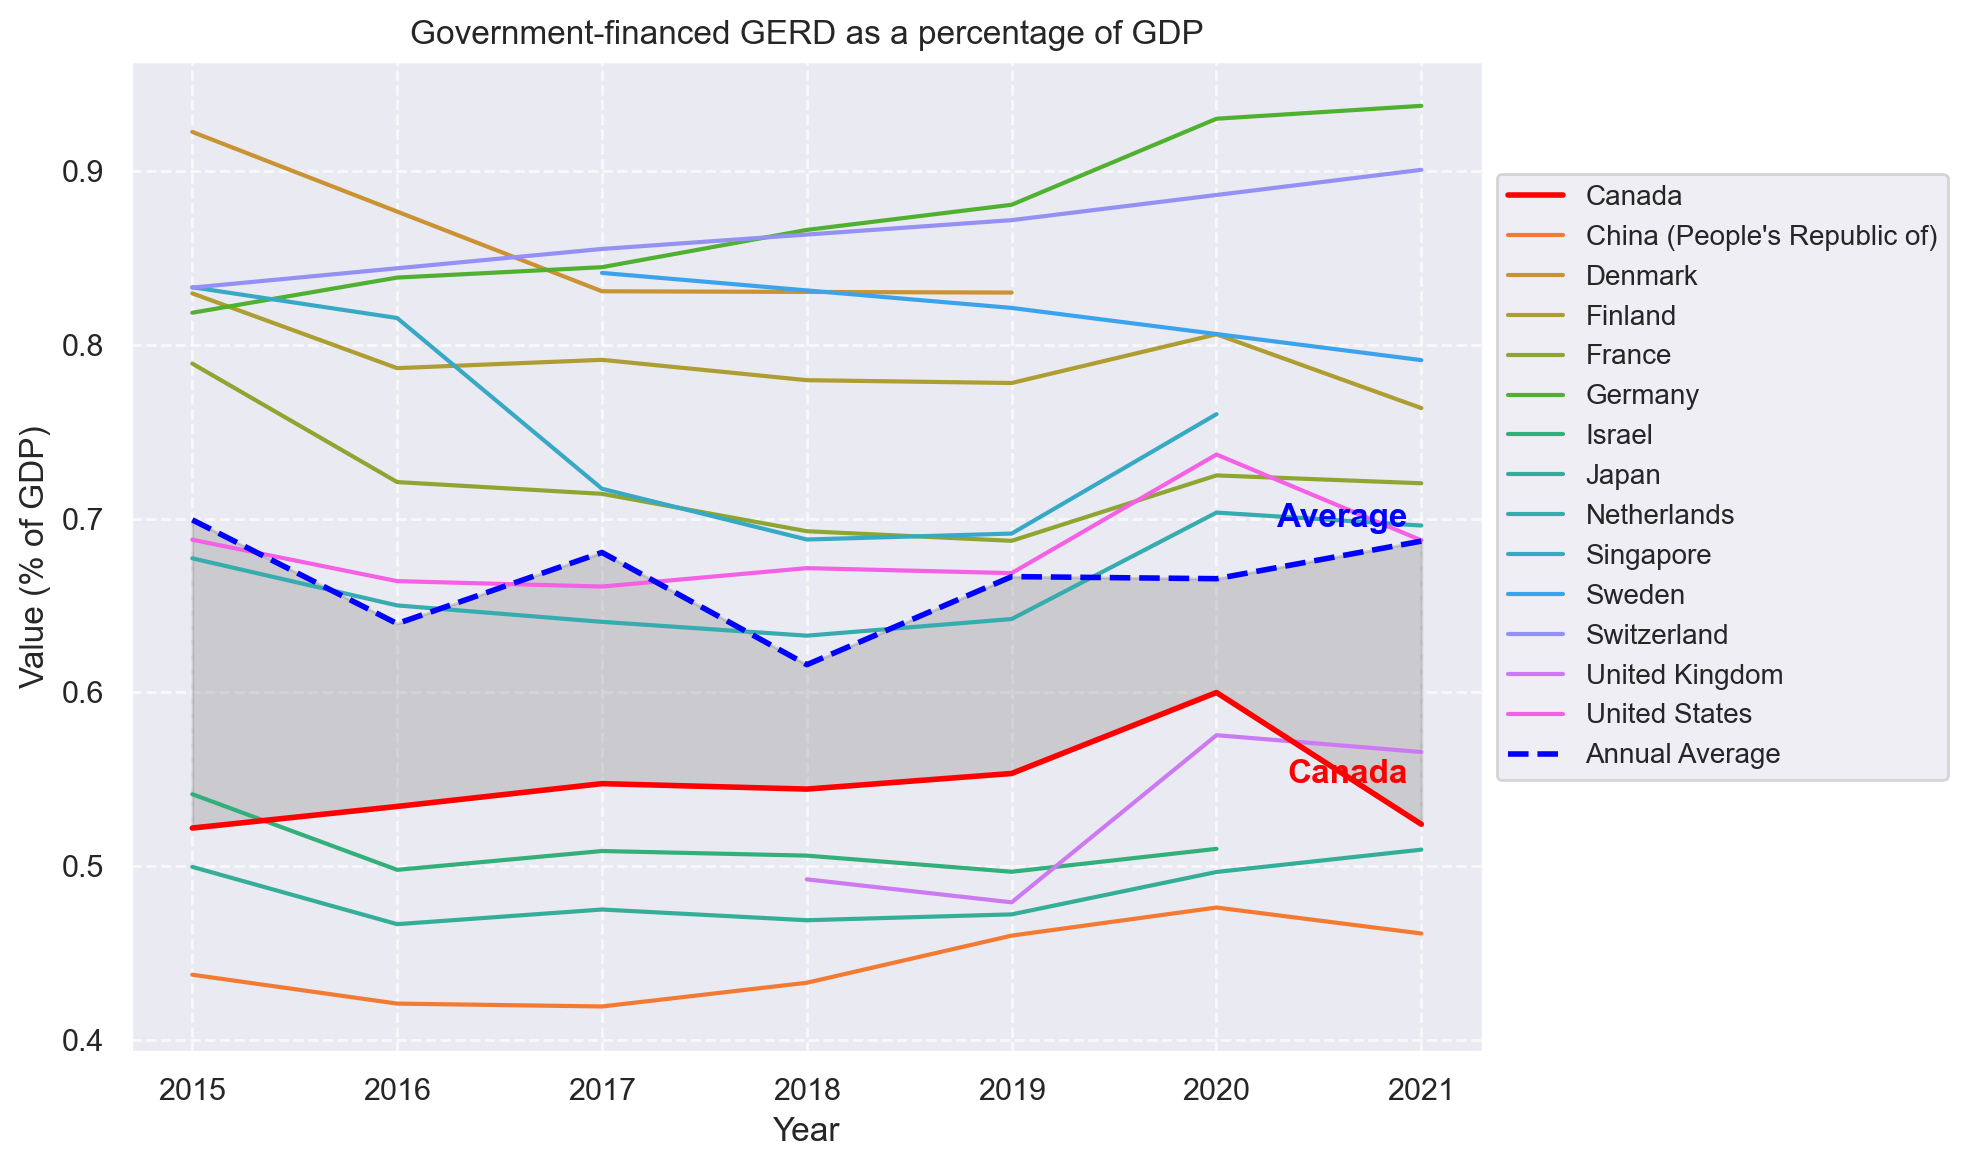

In [221]:
# # Load one of the CSV files (replace 'file_name.csv' with the actual filename)
directory = '/Users/declanbracken/Development/UofT_Projects/MIE_1624/Project/'
file_name = 'OECD_csv_files/Government-financed GERD as a percentage of GDP_data.csv'
file_directory = directory + file_name
df = pd.read_csv(file_directory)

# Plot data for selected countries and years
plot_data(df, selected_countries=Selected_Countries, yaxis_title = None, 
          selected_years=[2015, 2016, 2017, 2018, 2019, 2020, 2021], 
          use_shading = True, set_log_yaxis = False)


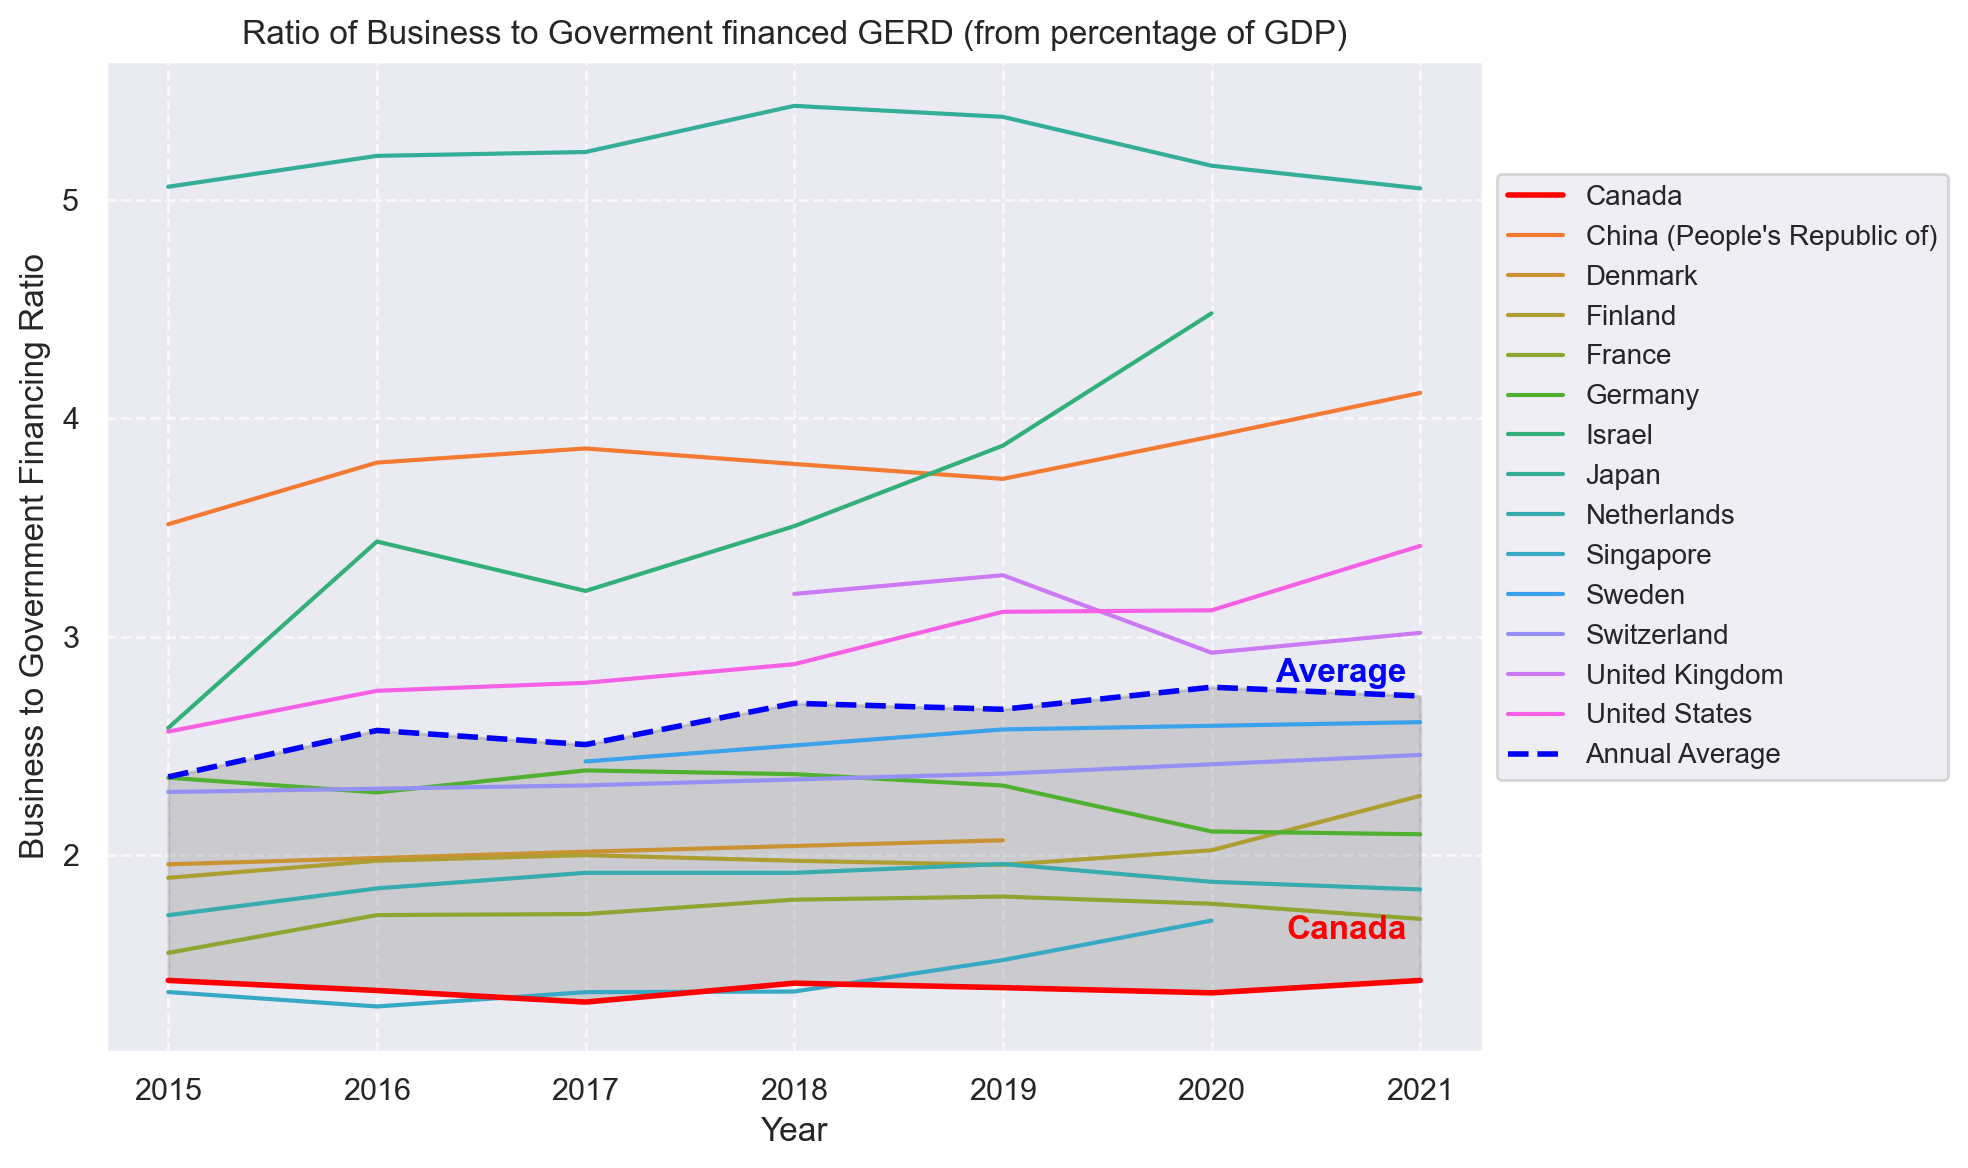

In [222]:
directory = '/Users/declanbracken/Development/UofT_Projects/MIE_1624/Project/'
file_name = 'OECD_csv_files/Government-financed GERD as a percentage of GDP_data.csv'
file_directory = directory + file_name
government_df = pd.read_csv(file_directory)

directory = '/Users/declanbracken/Development/UofT_Projects/MIE_1624/Project/'
file_name = 'OECD_csv_files/Business-financed GERD as a percentage of GDP_data.csv'
file_directory = directory + file_name
business_df = pd.read_csv(file_directory)


# Function to filter data for selected countries and years
def filter_data(df, selected_countries=None, selected_years=None):
    if selected_countries:
        df = df[df['COU'].isin(selected_countries)]
    if selected_years:
        df = df[df['Year'].isin(selected_years)]
    return df

# Function to calculate the ratio of business expenditure to government expenditure
def calculate_ratio(business_df, government_df):
    # Merge the two dataframes on 'Year' and 'COU' columns
    merged_df = pd.merge(business_df, government_df, on=['Year', 'COU', 'Country'], suffixes=('_business', '_government'))

    # Calculate the ratio of business expenditure to government expenditure
    merged_df['Expenditure_Ratio'] = merged_df['Value_business'] / merged_df['Value_government']
    
    return merged_df

# Example: Select countries and years
Selected_Countries = [
    "CHE", 
    "SWE", 
    "USA", 
    "GBR", 
    "SGP", 
    "FIN", 
    "NLD", 
    "DEU", 
    "DNK", 
    "PRK", 
    "FRA", 
    "CHN", 
    "JPN", 
    "ISR", 
    "CAN"
    ]

selected_years = [2015, 2016, 2017, 2018, 2019, 2020,2021]  # Selected years

# Filter data for selected countries and years
business_filtered = filter_data(business_df, Selected_Countries, selected_years)
government_filtered = filter_data(government_df, Selected_Countries, selected_years)
# Calculate the ratio of business expenditure to government expenditure
ratio_df = calculate_ratio(business_filtered, government_filtered)

# reset country column and MSTI Variables column


plot_data(ratio_df, selected_countries=Selected_Countries, 
          val_col = 'Expenditure_Ratio', 
          graph_title = 'Ratio of Business to Goverment financed GERD (from percentage of GDP)',
          yaxis_title = 'Business to Government Financing Ratio', 
          selected_years=selected_years, use_shading = True, set_log_yaxis = False)


# Print the resulting DataFrame


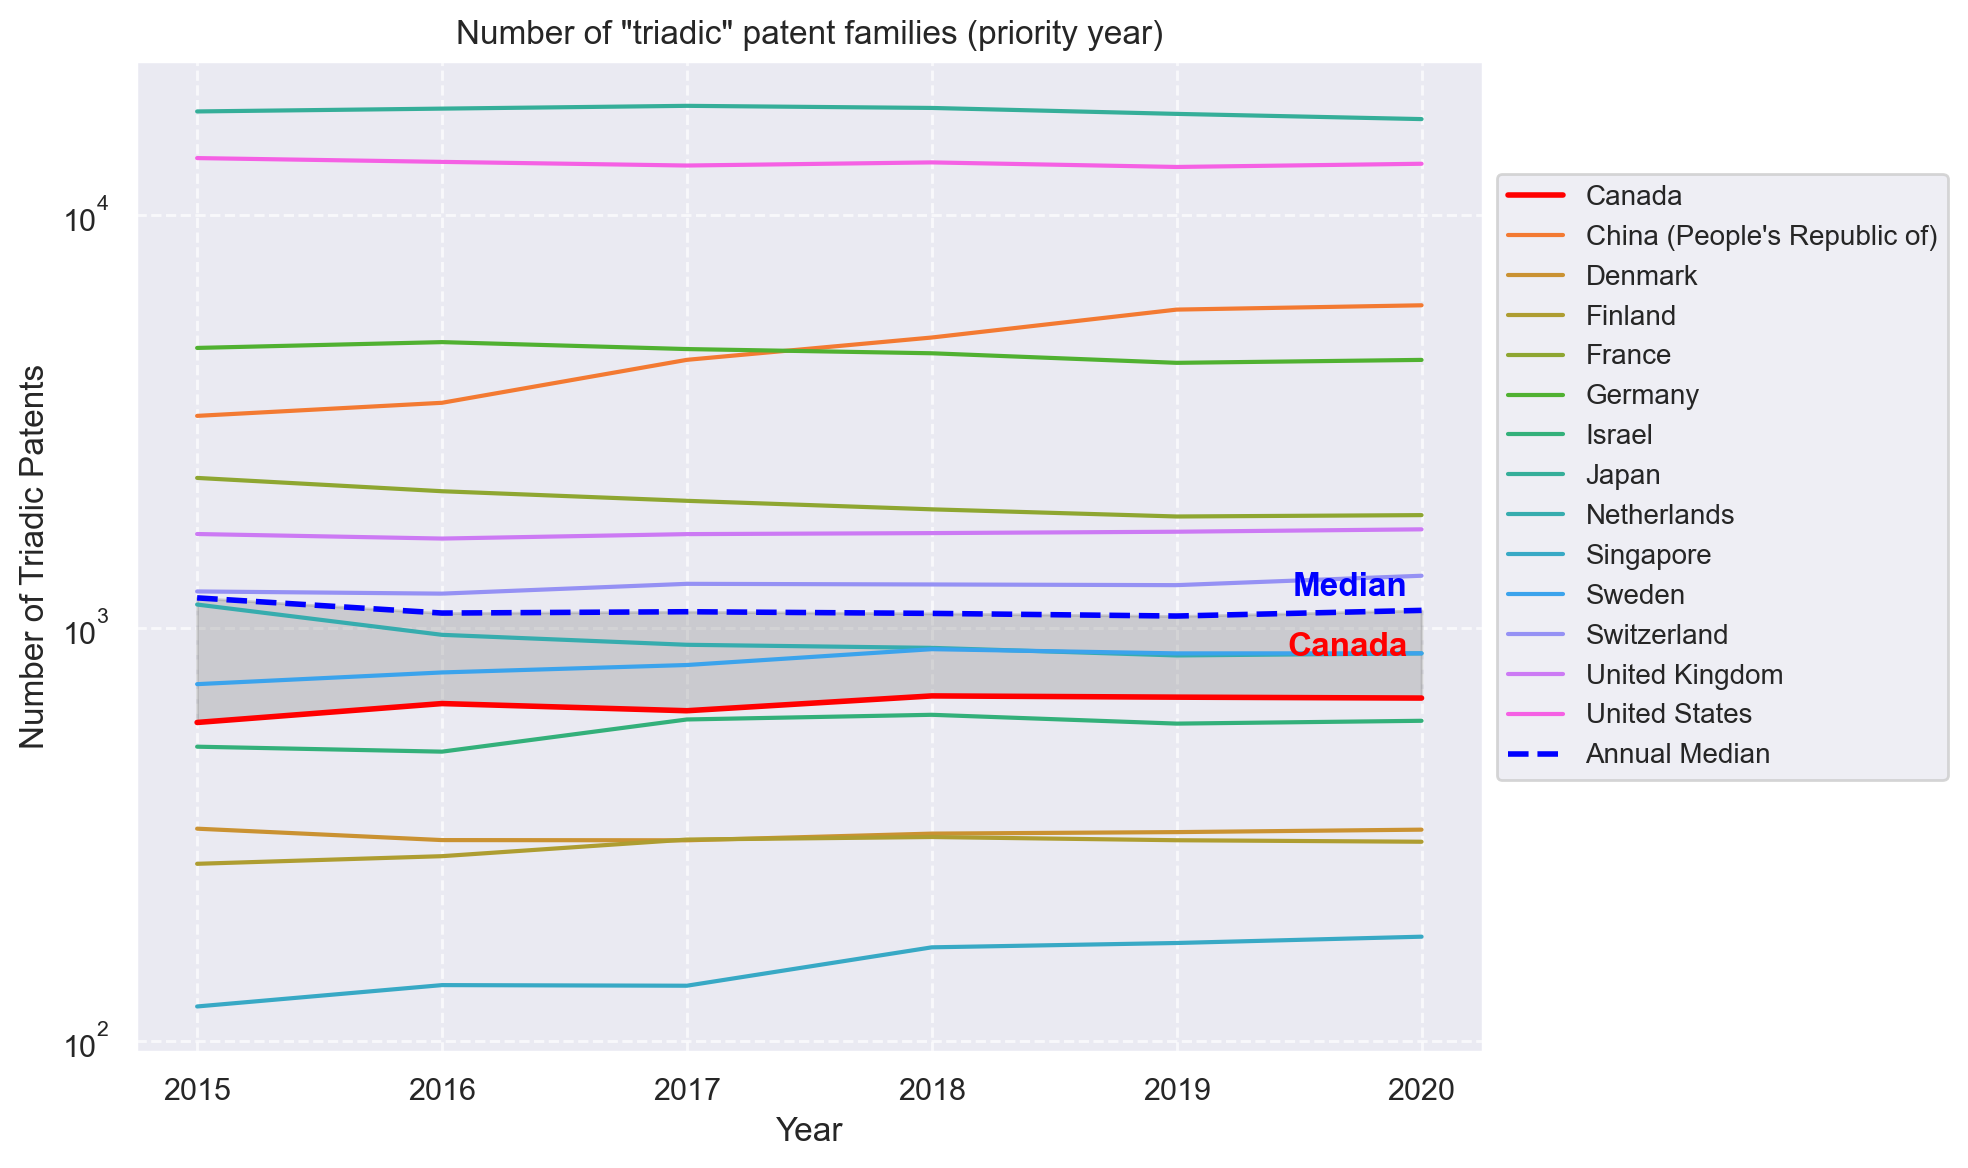

In [223]:
# Plot data for selected countries and years
plot_data_median(df, yaxis_title='Number of Triadic Patents',
          selected_countries=Selected_Countries, 
          selected_years=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], 
          use_shading = True, set_log_yaxis = True)

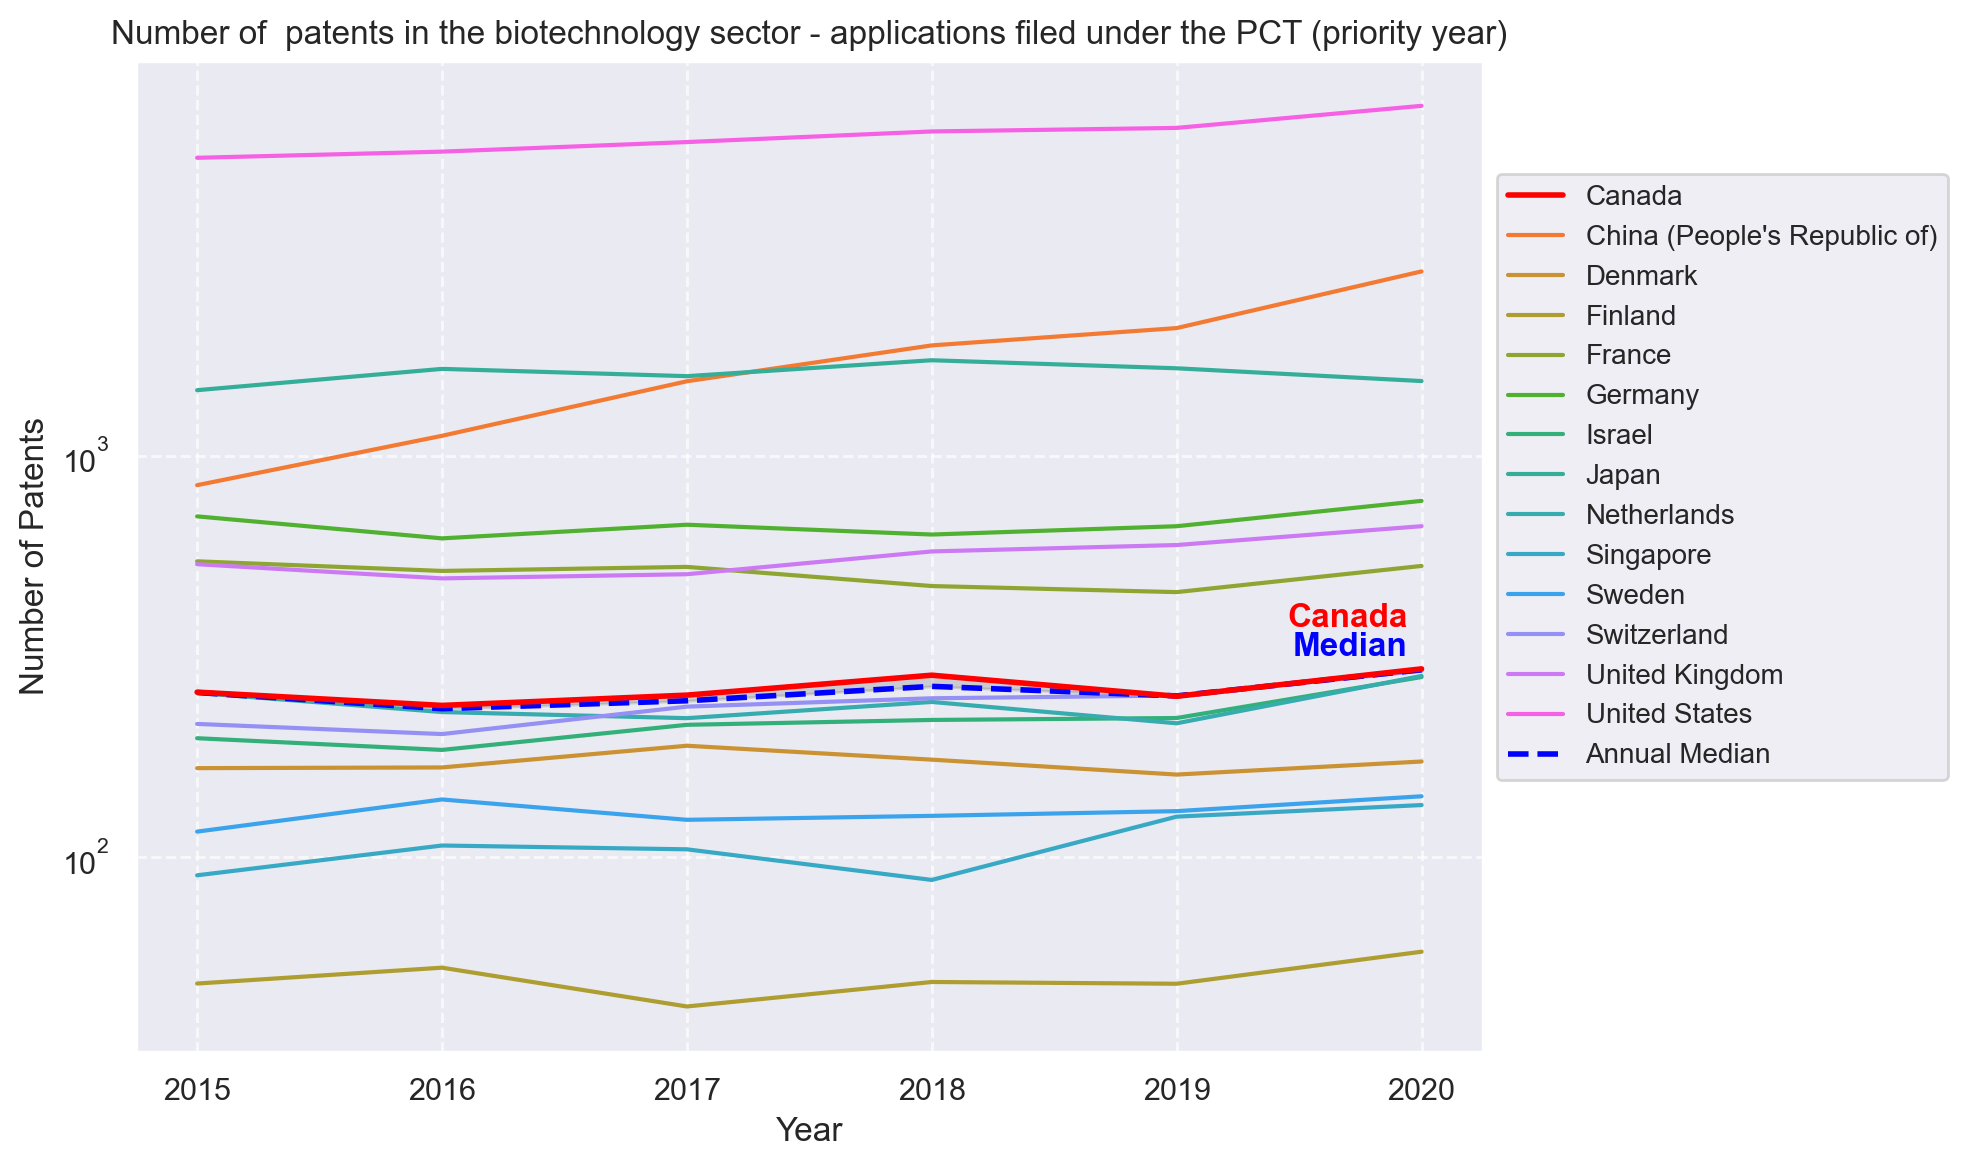

In [224]:
directory = '/Users/declanbracken/Development/UofT_Projects/MIE_1624/Project/'
file_name = 'OECD_csv_files/Number of  patents in the biotechnology sector - applications filed under the PCT (priority year)_data.csv'
file_directory = directory + file_name
df = pd.read_csv(file_directory)

# Plot data for selected countries and years
plot_data_median(df, yaxis_title='Number of Patents',
          selected_countries=Selected_Countries, 
          selected_years=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], 
          use_shading = True, set_log_yaxis = True)

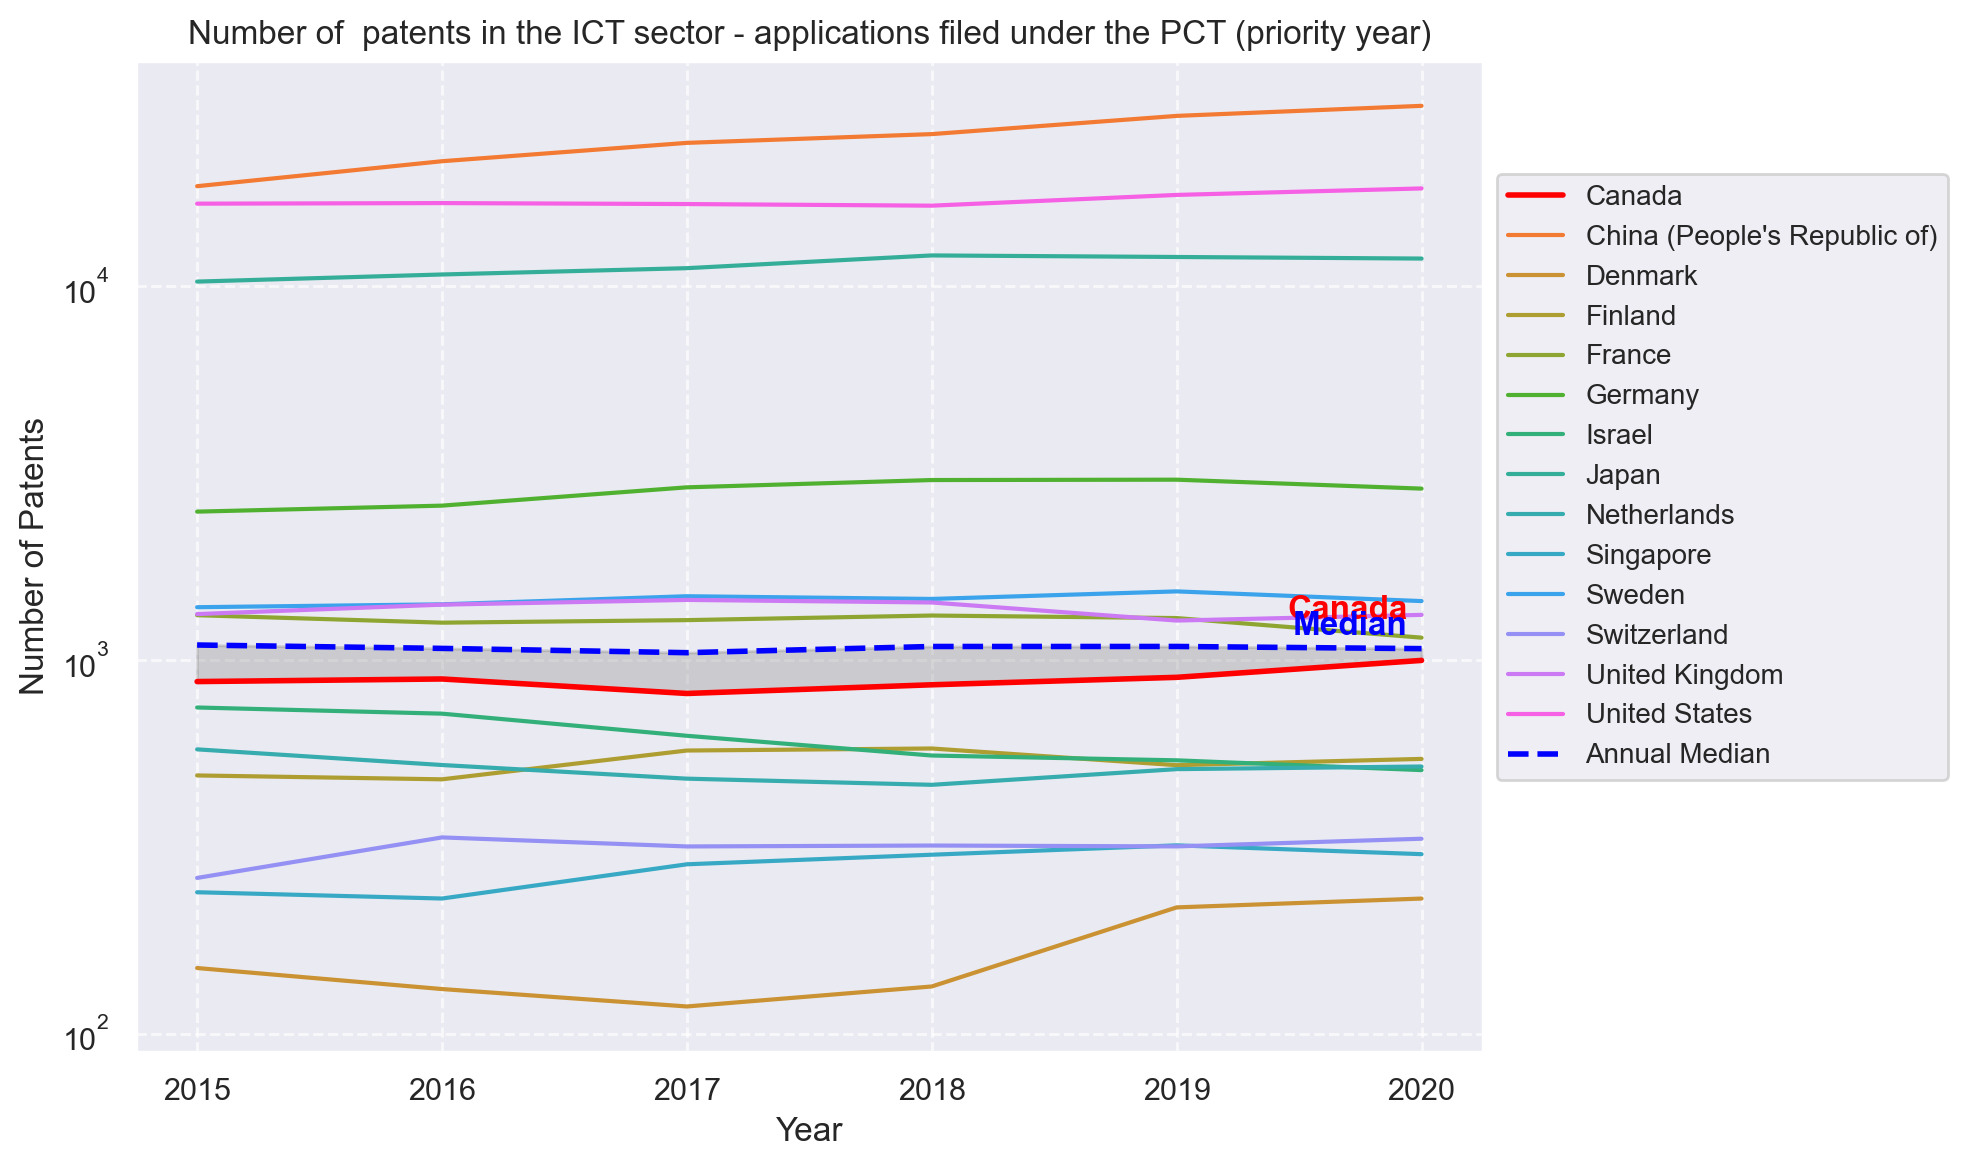

In [225]:
directory = '/Users/declanbracken/Development/UofT_Projects/MIE_1624/Project/'
file_name = 'OECD_csv_files/Number of  patents in the ICT sector - applications filed under the PCT (priority year)_data.csv'
file_directory = directory + file_name
df = pd.read_csv(file_directory)

# Plot data for selected countries and years
plot_data_median(df, yaxis_title='Number of Patents',
          selected_countries=Selected_Countries, 
          selected_years=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], 
          use_shading = True, set_log_yaxis = True)